# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

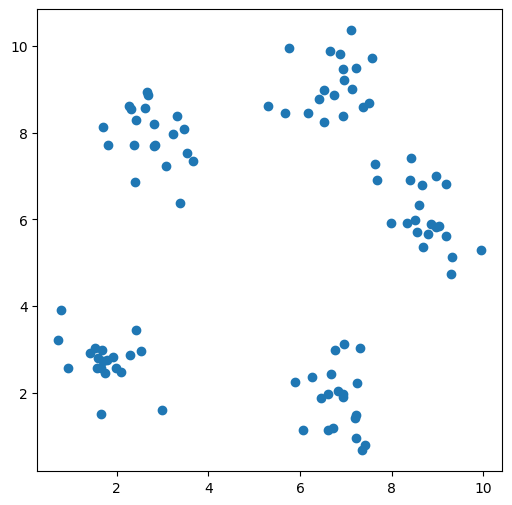

In [2]:
X = np.concatenate([
    np.array([np.random.normal(size=20, scale=0.7)+2, np.random.normal(size=20, scale=0.7)+3]).T, # (2, 3)
    np.array([np.random.normal(size=20, scale=0.7)+3, np.random.normal(size=20, scale=0.7)+8]).T, # (3, 8)
    np.array([np.random.normal(size=20, scale=0.7)+7, np.random.normal(size=20, scale=0.7)+9]).T, # (7, 9)
    np.array([np.random.normal(size=20, scale=0.7)+9, np.random.normal(size=20, scale=0.7)+6]).T, # (9, 6)
    np.array([np.random.normal(size=20, scale=0.7)+7, np.random.normal(size=20, scale=0.7)+2]).T  # (7, 2)
])

plt.figure(figsize=(6, 6))
plt.scatter(X.T[0], X.T[1])
plt.show()

# Model

In [3]:
class KMeans:
    def __init__(self, K=5, max_iters=100):
        self.K = K
        self.max_iters = max_iters
        self.clasters = [[] for _ in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape 
        
        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

        return self._get_clusters_labels(self.clusters)
    
    def get_centroids(self):
        return self.centroids

    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [self._euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _euclidean_distance(self, sample, point):
        return np.sqrt(np.sum((sample - point)**2))

    def _get_centroids(self, clusters):
        # assign median value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_median = np.median(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_median
        return centroids

    def _is_converged(self, centroids_old, centroids_new):
        # distances between old and new centroids, for all centroids
        disatances = [self._euclidean_distance(centroids_old[i], centroids_new[i]) for i in range(self.K)]
        return sum(disatances) == 0

    def _get_clusters_labels(self, clusters):
        # each sample will get the label of the clustre it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels

# Evaluate

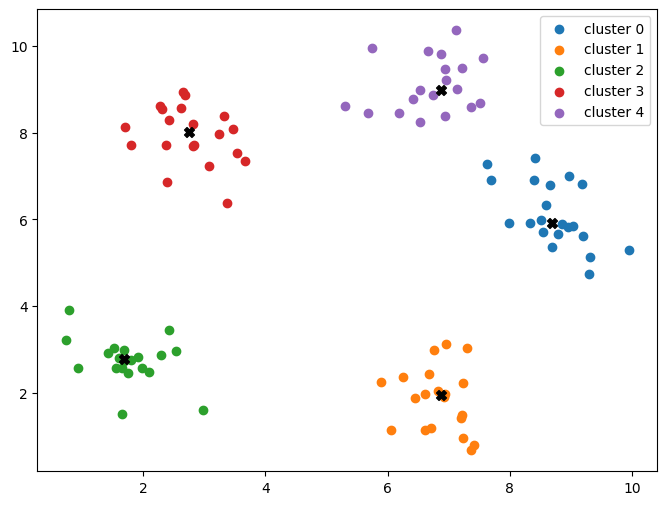

In [12]:
km = KMeans(K=5, max_iters=200)
y_pred = km.predict(X)
centroids = km.get_centroids()

plt.figure(figsize=(8, 6))
for cluster in np.unique(y_pred):
    plt.scatter(X[y_pred==cluster].T[0], X[y_pred==cluster].T[1], label=f"cluster {int(cluster)}")
plt.scatter(centroids.T[0], centroids.T[1], color="k", marker="X", s=50)
plt.legend()
plt.show()